<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [18]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Distribución de las variables numéricas:


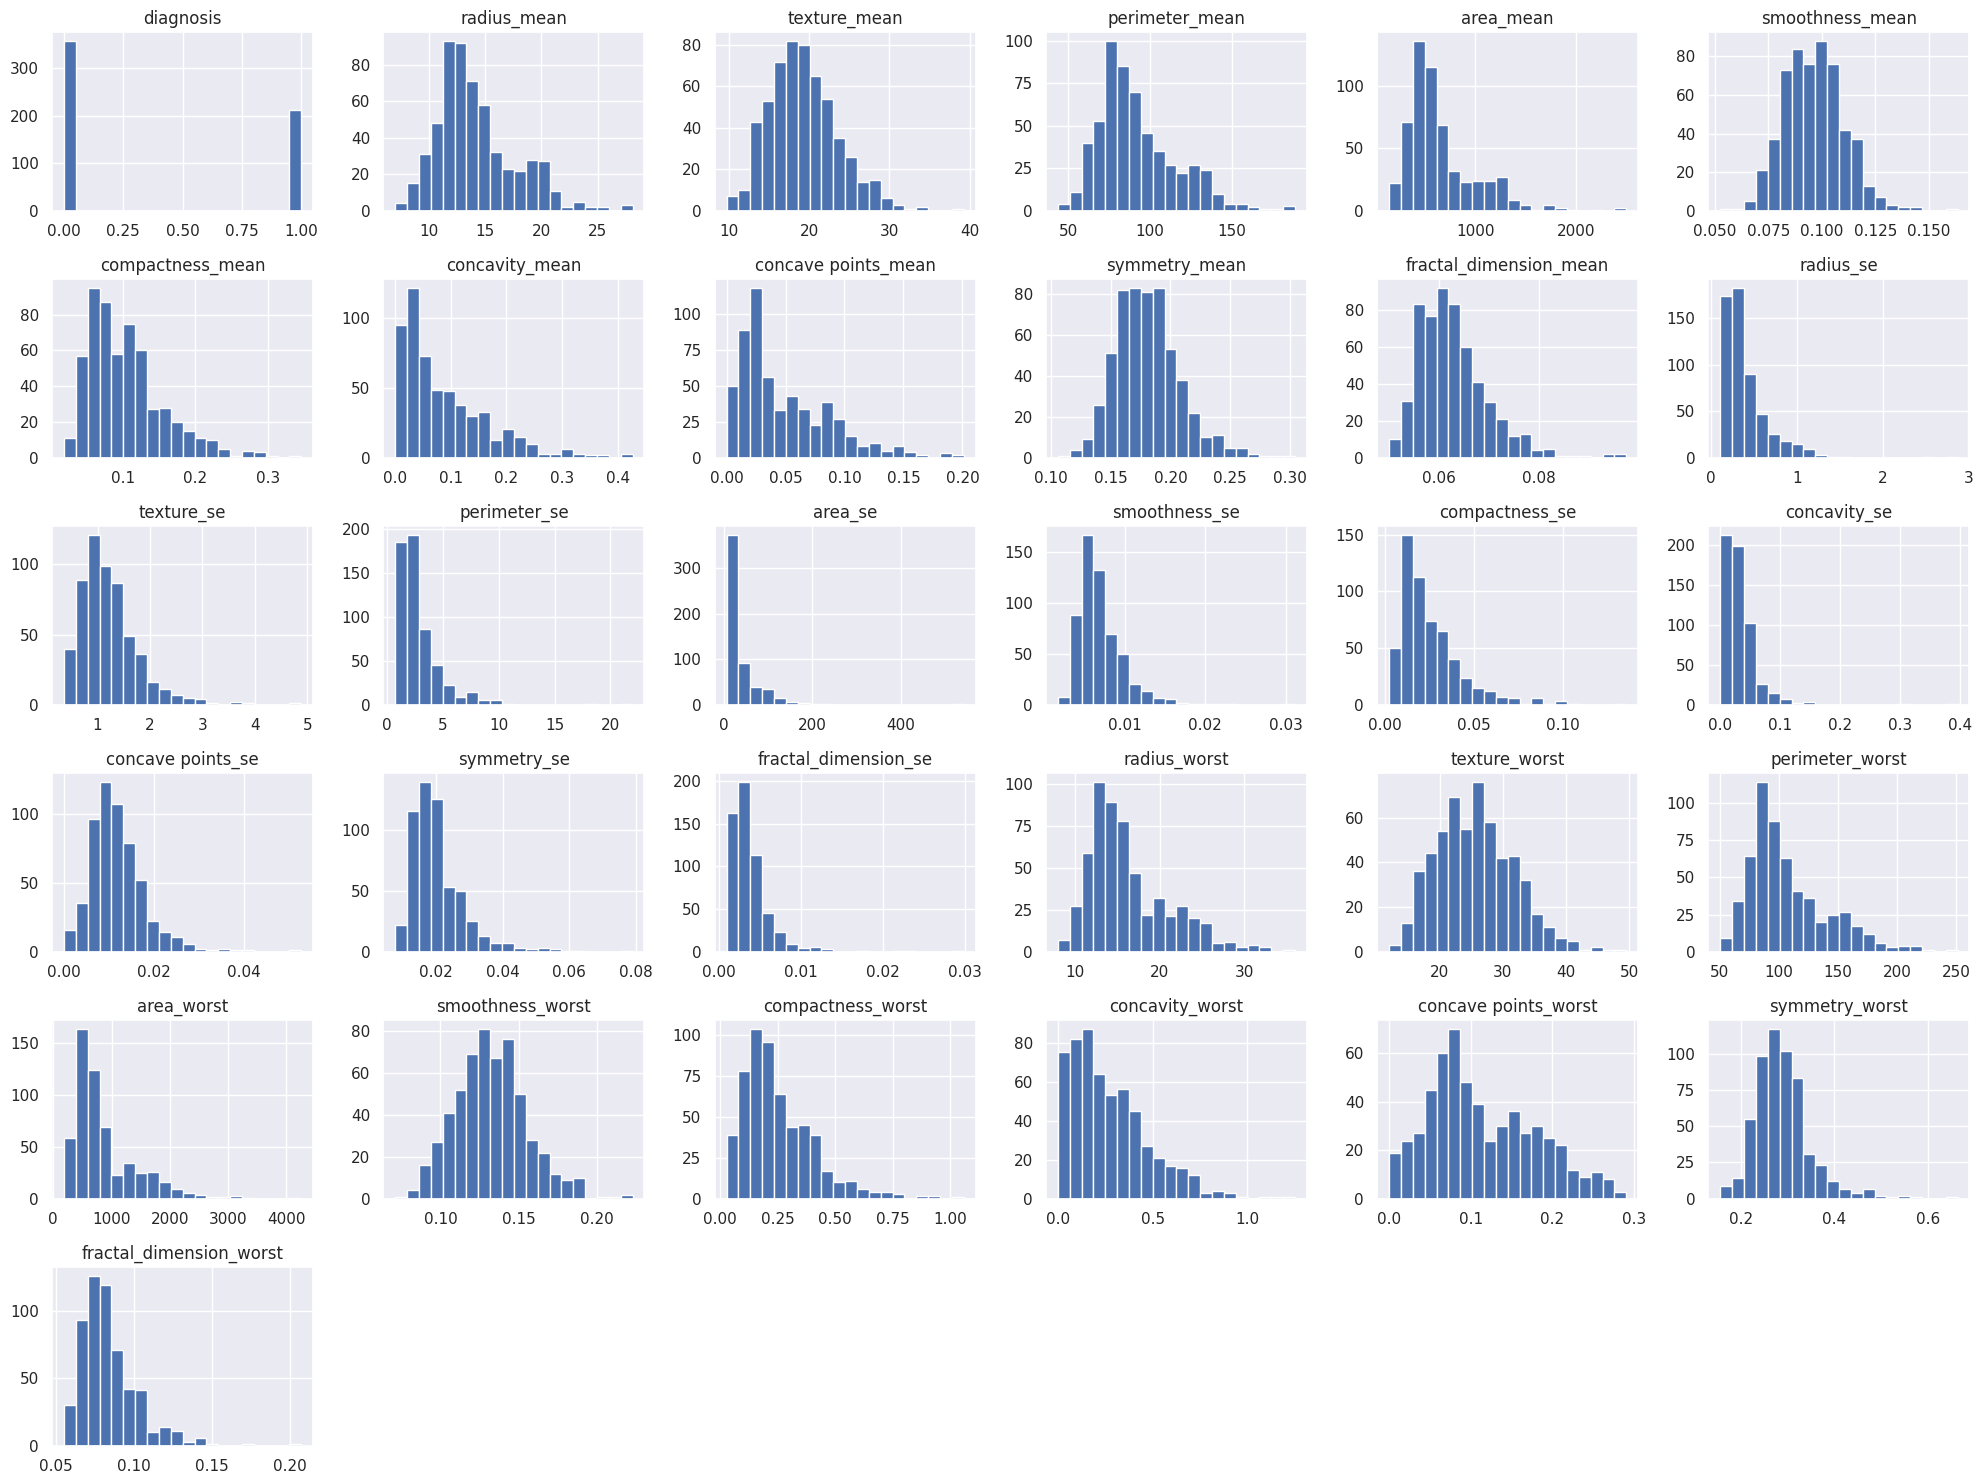


Boxplots para identificar valores atípicos:


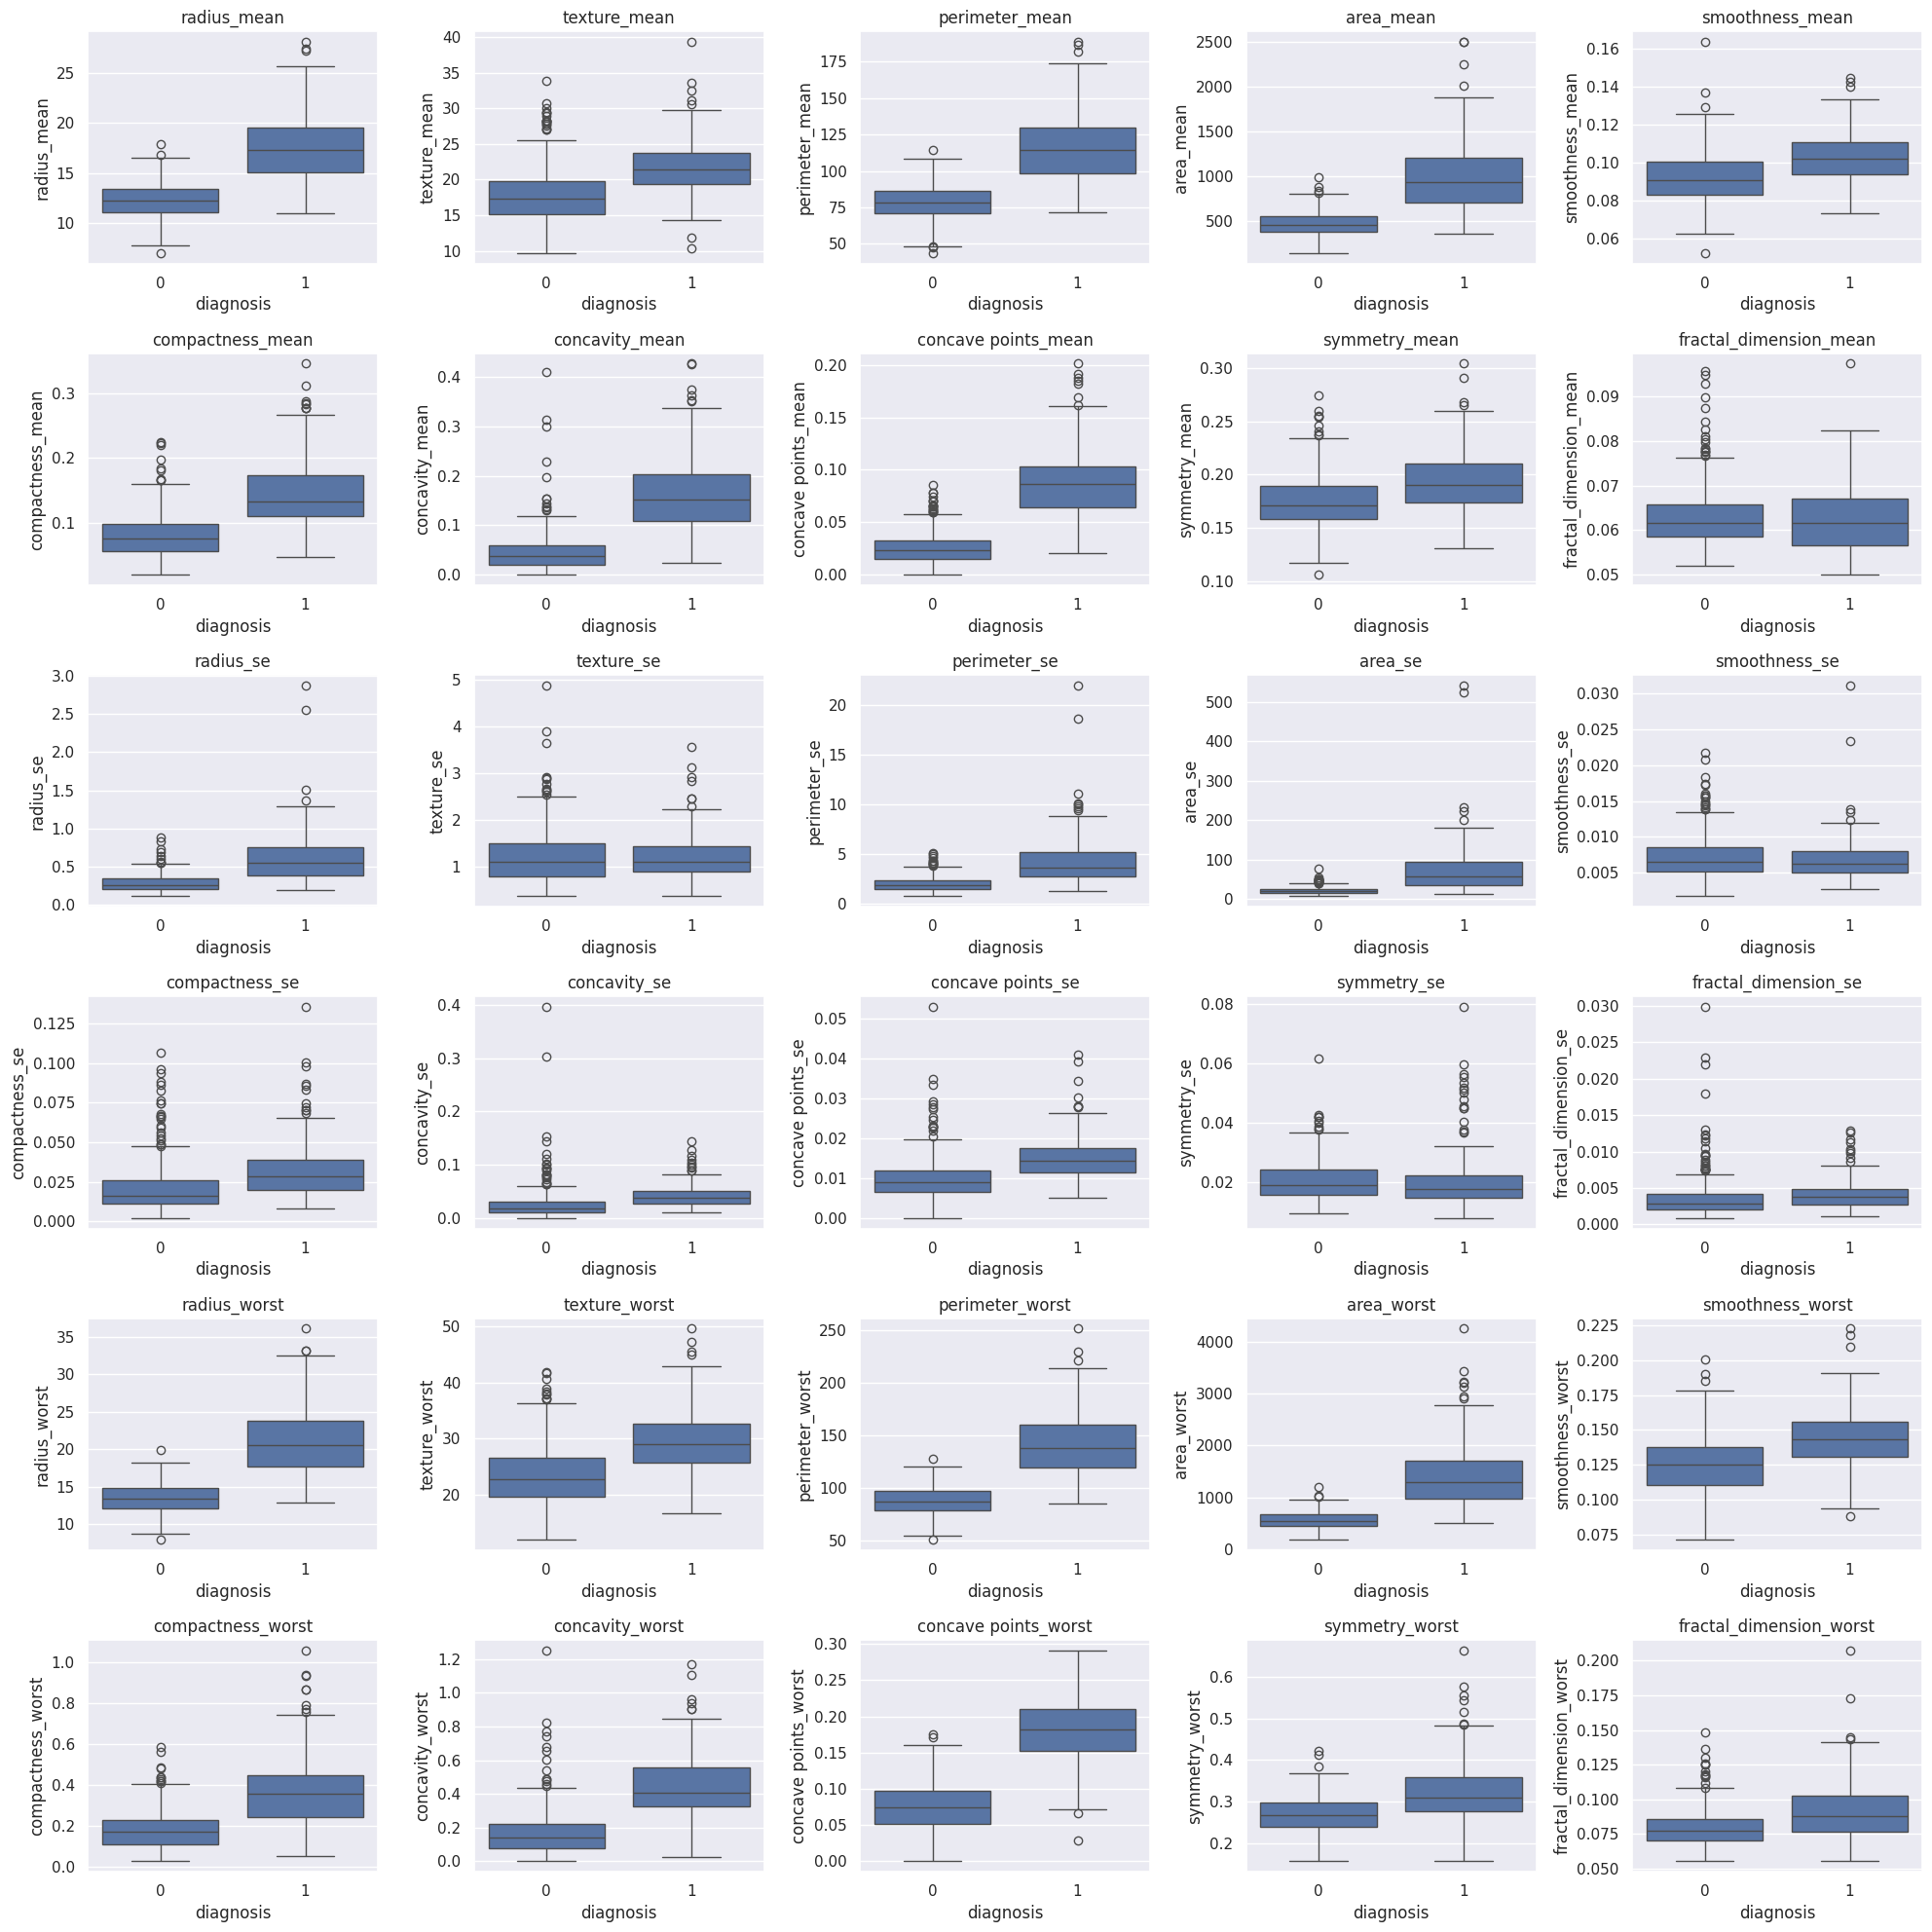


Matriz de correlación:


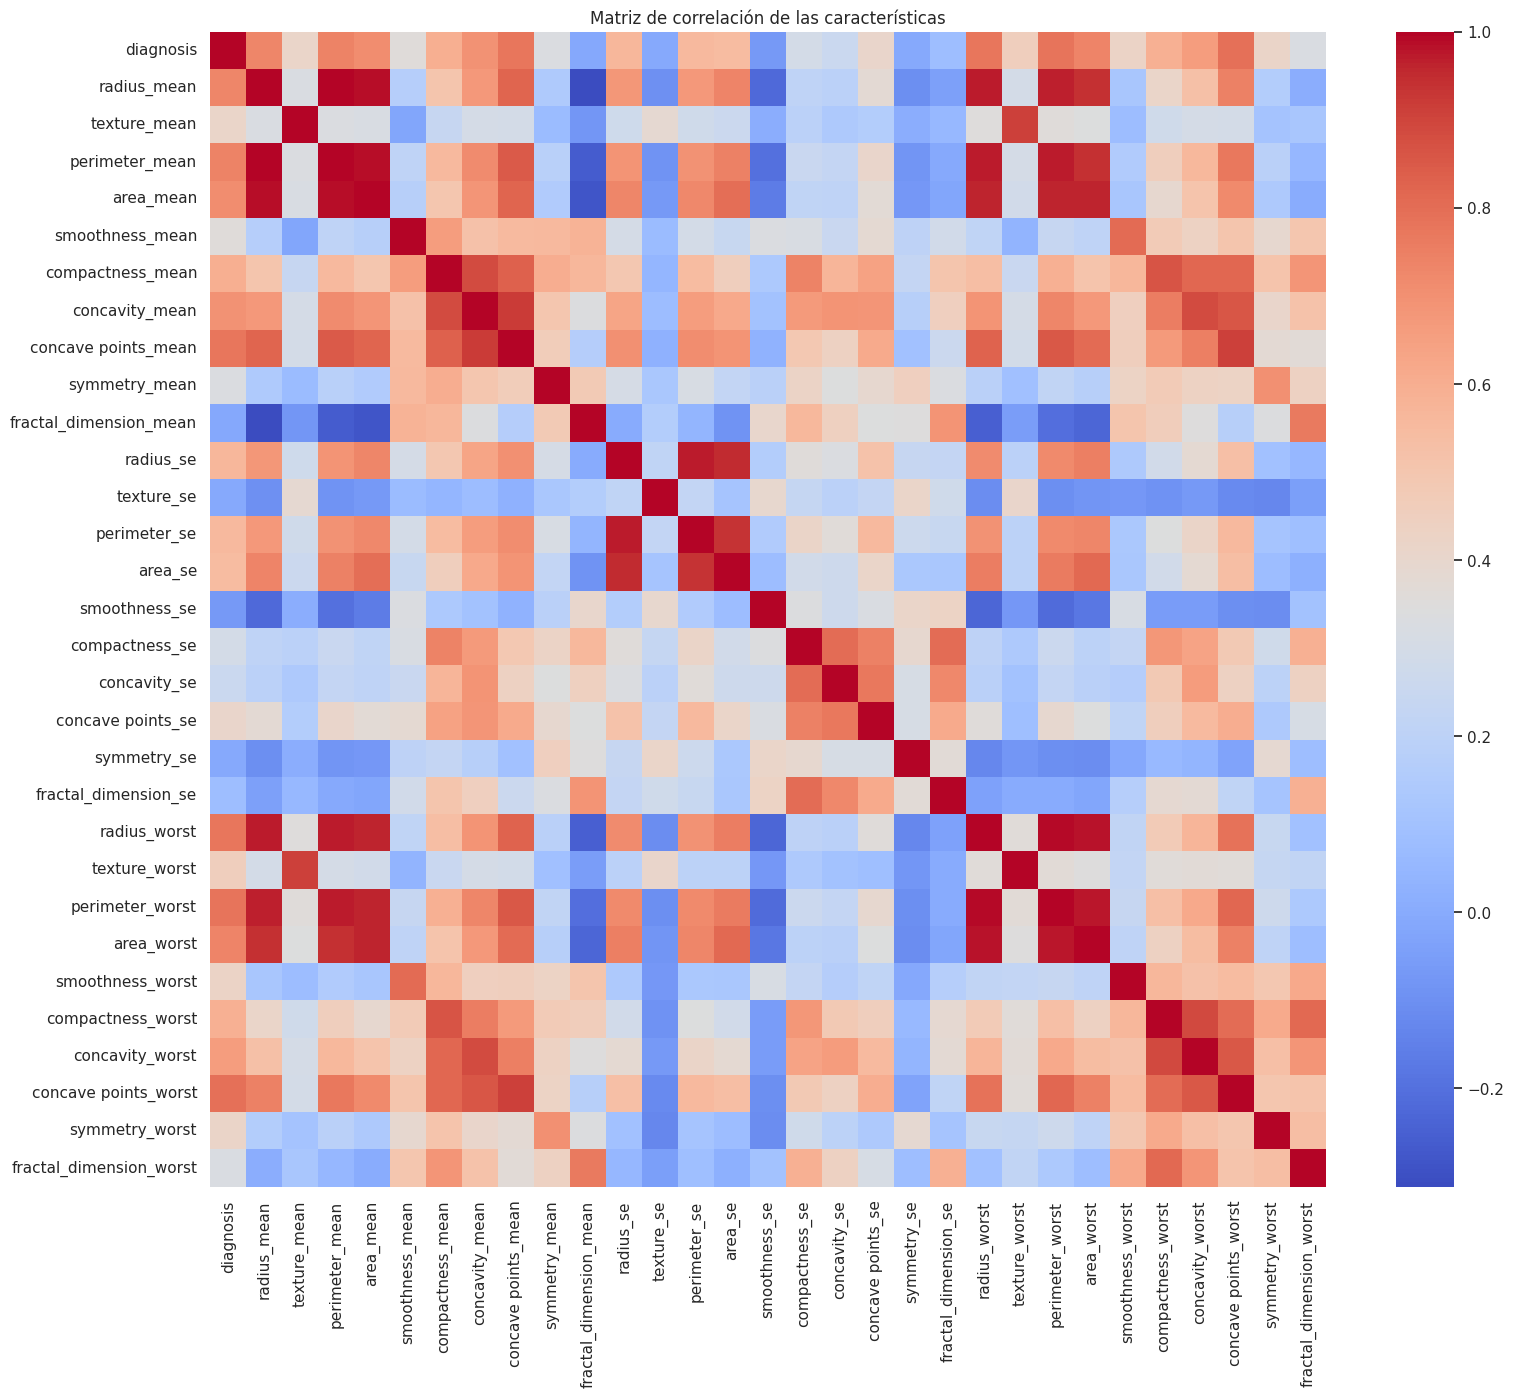


Comparación de características entre tumores benignos (0) y malignos (1):


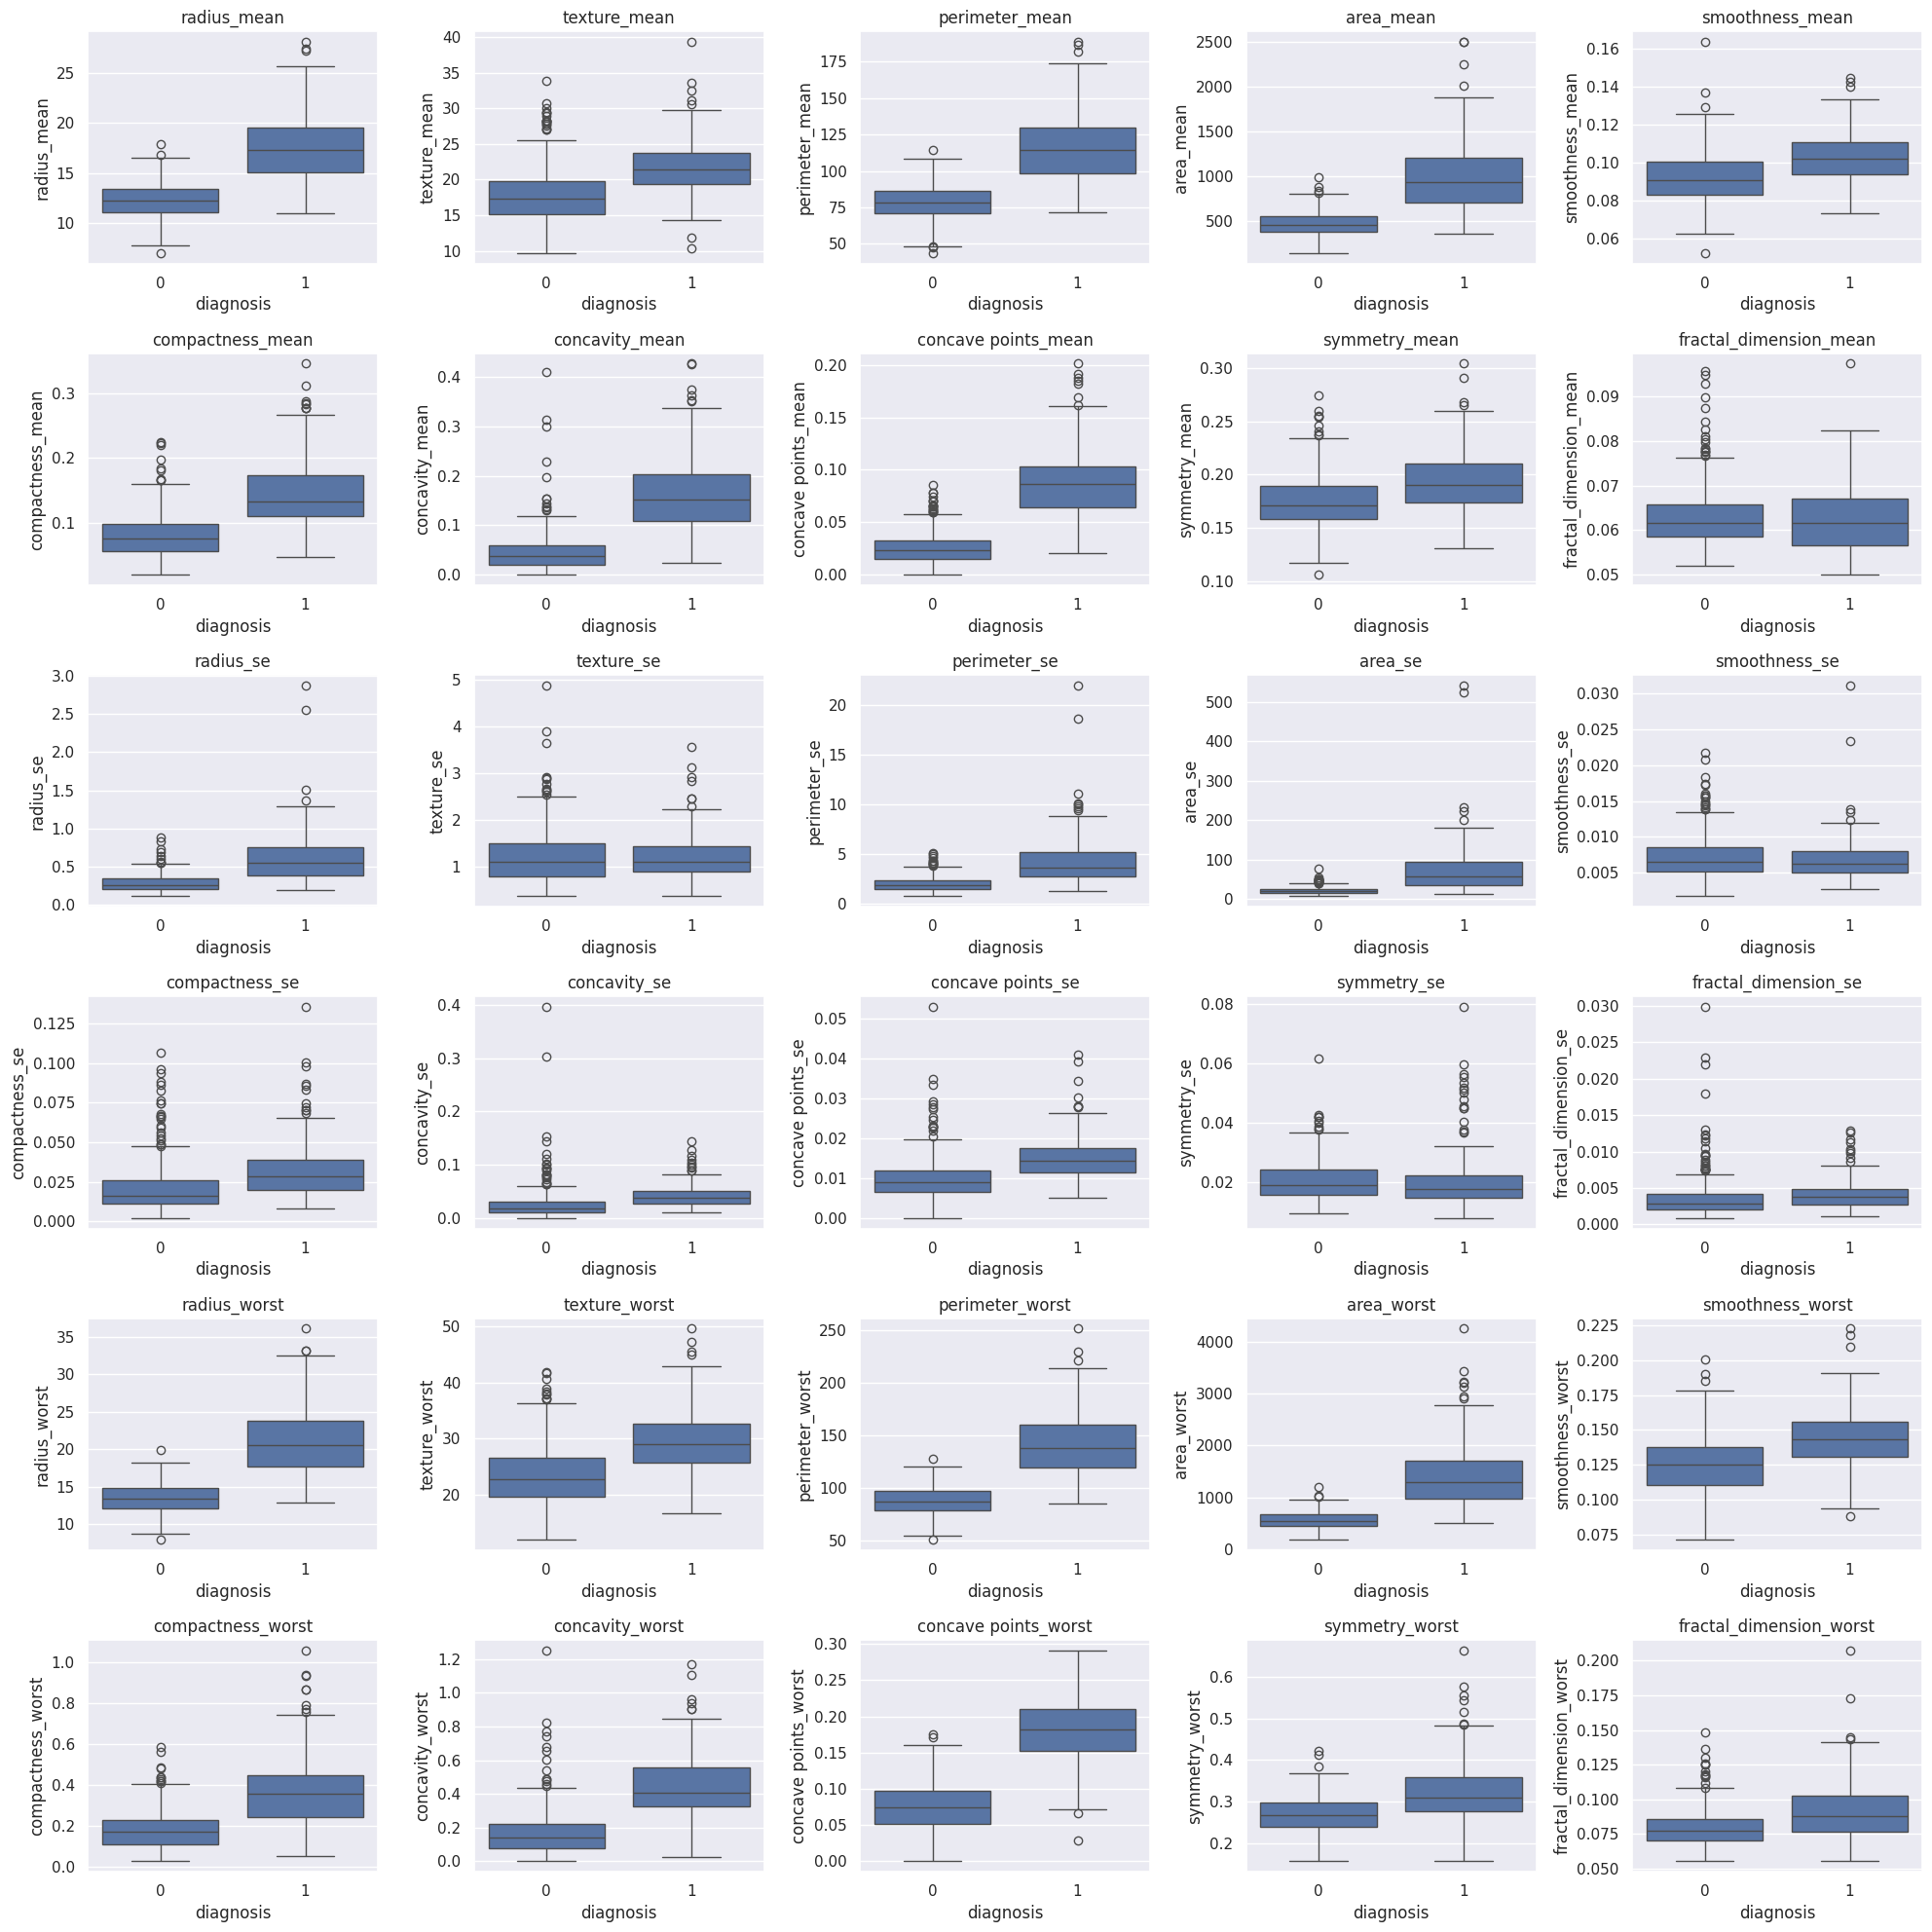

In [23]:
print("Distribución de las variables numéricas:")
df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

print("\nBoxplots para identificar valores atípicos:")
features = df.columns.drop('diagnosis')
plt.figure(figsize=(20, 20))
for i, col in enumerate(features):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(x='diagnosis', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

print("\nMatriz de correlación:")
corr_matrix = df.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación de las características')
plt.show()

print("\nComparación de características entre tumores benignos (0) y malignos (1):")
plt.figure(figsize=(20, 20))
for i, col in enumerate(features):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(x='diagnosis', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

RESPUESTA:

Las variables más discriminativas son aquellas que reflejan diferencias sustanciales en el tamaño, forma y características de los núcleos celulares entre tumores benignos y malignos.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [20]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Primeras filas del DataFrame escalado:")
display(X_scaled_df.head())

Primeras filas del DataFrame escalado:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


RESPUESTA:

Se utiliza StandardScaler para normalizar las características numéricas, lo que transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Esto es crucial para algoritmos que se basan en distancias
No se aplica una estrategia explícita de eliminación de multicolinealidad en este paso, ya que la reducción de dimensionalidad con PCA en el siguiente paso abordará este tema alcrear componentes ortogonales.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Varianza explicada por cada componente principal:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

Varianza explicada acumulada:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


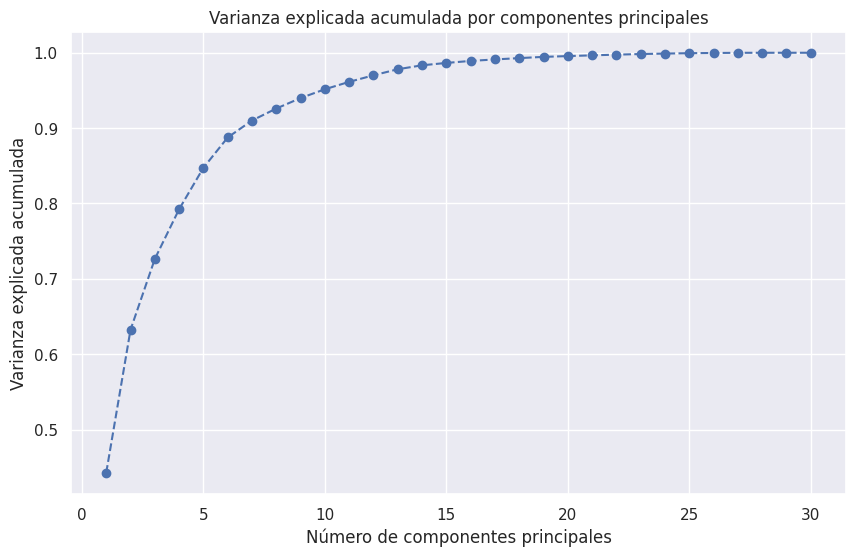

In [21]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance_ratio)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza explicada acumulada:")
print(cumulative_explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

RESPUESTA:

Analizando la varianza explicada acumulada, podemos seleccionar un número
de componentes que retenga una proporción suficiente de la información original.
La visualización en 2D nos da una idea inicial de qué tan bien PCA separa las clases.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [22]:
from sklearn.metrics import confusion_matrix, roc_auc_score

n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nNúmero de componentes principales para retener el 95% de la varianza: {n_components_95}")

pca_final = PCA(n_components=n_components_95)
X_pca_final = pca_final.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.3, random_state=42, stratify=y)

print("\nDimensiones de los conjuntos de datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Regresion logistica
log_reg = LogisticRegression(solver='liblinear')
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# SVM
svm = SVC(probability=True)
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200, 500],
                  'max_depth': [5, 10, None],
                  'min_samples_split': [2, 5, 10]}

models = {
    'Logistic Regression': (log_reg, param_grid_lr),
    'SVM': (svm, param_grid_svm),
    'Random Forest': (rf, param_grid_rf)
}

results = {}

for model_name, (model, param_grid) in models.items():
    print(f"\nEntrenando y optimizando {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test)[:, 1]
        auc_roc = roc_auc_score(y_test, y_prob)
    elif hasattr(best_model, "decision_function"):
        y_score = best_model.decision_function(X_test)
        auc_roc = roc_auc_score(y_test, y_score)
    else:
        auc_roc = "N/A"

    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'AUC-ROC': auc_roc
    }

    print(f"Resultados para {model_name}:")
    print(f"Mejores parámetros: {results[model_name]['Best Parameters']}")
    print(f"Accuracy: {results[model_name]['Accuracy']:.4f}")
    print(f"Precision: {results[model_name]['Precision']:.4f}")
    print(f"Recall: {results[model_name]['Recall']:.4f}")
    print(f"F1 Score: {results[model_name]['F1 Score']:.4f}")
    print(f"AUC-ROC: {results[model_name]['AUC-ROC']:.4f}" if isinstance(results[model_name]['AUC-ROC'], float) else f"AUC-ROC: {results[model_name]['AUC-ROC']}")
    print("Matriz de Confusión:")
    print(results[model_name]['Confusion Matrix'])


Número de componentes principales para retener el 95% de la varianza: 10

Dimensiones de los conjuntos de datos:
X_train: (398, 10)
X_test: (171, 10)
y_train: (398,)
y_test: (171,)

Entrenando y optimizando Logistic Regression...
Resultados para Logistic Regression:
Mejores parámetros: {'C': 1}
Accuracy: 0.9766
Precision: 0.9839
Recall: 0.9531
F1 Score: 0.9683
AUC-ROC: 0.9981
Matriz de Confusión:
[[106   1]
 [  3  61]]

Entrenando y optimizando SVM...
Resultados para SVM:
Mejores parámetros: {'C': 1, 'gamma': 0.01}
Accuracy: 0.9591
Precision: 1.0000
Recall: 0.8906
F1 Score: 0.9421
AUC-ROC: 0.9982
Matriz de Confusión:
[[107   0]
 [  7  57]]

Entrenando y optimizando Random Forest...
Resultados para Random Forest:
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy: 0.9474
Precision: 0.9508
Recall: 0.9062
F1 Score: 0.9280
AUC-ROC: 0.9939
Matriz de Confusión:
[[104   3]
 [  6  58]]



5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



RESPUESTA:

Hemos aplicado un flujo completo de Machine Learning para la clasificación de tumores mamarios utilizando el conjunto de datos:

1.  Se realizó un EDA para entender las distribuciones, correlaciones y diferencias entre tumores benignos y malignos. Se identificaron variables relacionadas con el tamaño, perímetro, área, concavidad y puntos cóncavos como las más discriminativas.
2.  Durante el preprocesamiento de datos, se normalizaron las características numéricas utilizando StandardScaler.
3.  Con PCA, que redujo las 30 características originales a 10 componentes principales, reteniendo aproximadamente el 95% de la varianza y ayudando a manejar la multicolinealidad.
4.  Se modelaron y evaluaron los datos, donde se entrenaron y optimizaron hiperparámetros para tres modelos de clasificación: Regresión Logística, SVM y Random Forest. Se evaluó su rendimiento utilizando métricas como accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC.

La **Regresión Logística** mostró el mejor rendimiento general, logrando alta precisión, recall y un AUC-ROC de 0.9981.
**SVM** tuvo una precisión perfecta (1.0000) pero un recall ligeramente menor (0.8906), lo que resultó en más falsos negativos.
**Random Forest** tuvo métricas ligeramente inferiores en comparación.

En conclusión, la regresión logística parece ser el modelo más apropiado para este conjunto de datos, ofreciendo un excelente equilibrio entre precisión y capacidad para detectar tumores malignos. Por un lado, el preprocesamiento fue esencial. La reducción de dimensionalidad con PCA fue efectiva para simplificar el modelo y mejorar su rendimiento. Por el otro, se podrían explorar otros modelos, optimizar hiperparámetros de forma más exhaustiva, considerar el desbalance de clases y, fundamentalmente, incorporar la validación y opinión de expertos médicos en un escenario clínico real.